In [1]:
import numpy as np
import pandas as pd
import os, re, math, platform
from pathlib import Path
import matplotlib.pyplot as plt
import json
import joblib
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc, fbeta_score
from imblearn.metrics import geometric_mean_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from xgboost import plot_importance
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis as PA
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor
from matplotlib import pyplot
from sklearn.metrics import matthews_corrcoef, confusion_matrix,precision_recall_curve, roc_curve, auc, fbeta_score,roc_auc_score
from fea_extract import read_fasta,insert_AAC,insert_DPC,insert_CKSAAGP,insert_CTD,insert_PAAC,insert_AAI,insert_GTPC,insert_QSO,insert_AAE,insert_PSAAC,insert_word2int,insert_ASDC
import warnings 
from collections import Counter
from tools import cv,evaluate, pro_data
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
warnings.filterwarnings('ignore')
seed=10

In [2]:
X_test_norm = pd.read_csv('data/test/X_test_norm.csv').to_numpy()
y_test_norm =pd.read_csv('data/test/y_test.csv').to_numpy()
X_train_resampled = pd.read_csv('data/train/X_train_resampled.csv').to_numpy()
y_train_resampled = pd.read_csv('data/train/y_train_resampled.csv').to_numpy()

In [3]:
#Boruta
from boruta import BorutaPy
#打乱数据
np.random.seed(1234)
idx = np.random.permutation(len(X_train_resampled))
X_norm_train = X_train_resampled[idx]
y_norm_train = y_train_resampled[idx]
ET = ExtraTreesClassifier(random_state=10)
xgb = XGBClassifier(random_state = 10)
feat_selector = BorutaPy(xgb, n_estimators='auto', verbose=2, random_state=seed)

In [4]:
feat_selector.fit(X_norm_train,y_norm_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1296
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	162
Rejected: 	1134
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	139
Rejected: 	1134
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	139
Rejected: 	1134
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	139
Rejected: 	1134
Iteration: 	12 / 100
Confirmed: 	31
Tentative: 	96
Rejected: 	1169
Iteration: 	13 / 100
Confirmed: 	31
Tentative: 	96
Rejected: 	1169
Iteration: 	14 / 100
Confirmed: 	31
Tentative: 	96
Rejected: 	1169
Iteration: 	15 / 100
Confirmed: 	31
Tentative: 	96
Rejected: 	1169
Iteration: 	16 

BorutaPy(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                 colsample_bylevel=1, colsample_bynode=1,
                                 colsample_bytree=1, gamma=0, gpu_id=-1,
                                 importance_type='gain',
                                 interaction_constraints='',
                                 learning_rate=0.300000012, max_delta_step=0,
                                 max_depth=6, min_child_weight=1, missing=nan,
                                 monotone_constraints='()', n_estimators=223,
                                 n_jobs=0, num_parallel_tree=1,
                                 random_state=1230246691, reg_alpha=0,
                                 reg_lambda=1, scale_pos_weight=1, subsample=1,
                                 tree_method='exact', validate_parameters=1,
                                 verbosity=None),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1B738C62540, 

In [5]:
index_ = feat_selector.ranking_

In [1]:
index = pd.DataFrame(index_[:73])
index.to_csv('Boruta_index.csv')

NameError: name 'pd' is not defined

In [13]:
PAAC=23
AAC=20
CKSAAGP=75
CTD=147
DPC=400
GTPC=125
QSO=46
AAE=60
ASDC=400
PAAC_N=0
AAC_N=0
CKSAAGP_N=0
CTD_N=0
DPC_N=0
GTPC_N=0
QSO_N=0
AAE_N=0
ASDC_N=0

In [14]:
NUM=[]
NUM1 = []
for i in index_[:73]:
    if 0<= int(i) <23:
        PAAC_N += 1
    elif 23<= int(i) <43:
        AAC_N += 1
    elif 43<= int(i) <118:
        CKSAAGP_N += 1
    elif 118<= int(i) <265:
        CTD_N += 1
    elif 265<= int(i) <665:
        DPC_N += 1
    elif 665<= int(i) <790:
        GTPC_N += 1
    elif 790<= int(i) <836:
        QSO_N += 1
    elif 836<= int(i) <896:
        AAE_N += 1
    elif 896<= int(i) <1296:
        ASDC_N += 1
NUM.append(PAAC_N/23)
NUM.append(AAC_N/20)
NUM.append(CKSAAGP_N/75)
NUM.append(CTD_N/147)
NUM.append(DPC_N/400)
NUM.append(GTPC_N/125)
NUM.append(QSO_N/46)
NUM.append(AAE_N/60)
NUM.append(ASDC_N/400)
NUM1.append(PAAC_N)
NUM1.append(AAC_N)
NUM1.append(CKSAAGP_N)
NUM1.append(CTD_N)
NUM1.append(DPC_N)
NUM1.append(GTPC_N)
NUM1.append(QSO_N)
NUM1.append(AAE_N)
NUM1.append(ASDC_N)

In [15]:
NUm = np.array(NUM)*(73/1296)

In [16]:
names = ['PAAC','AAC','CKSAAGP','CTD','DPC','GTPC','QSO','AAE','ASDC']

(0.0, 0.5)

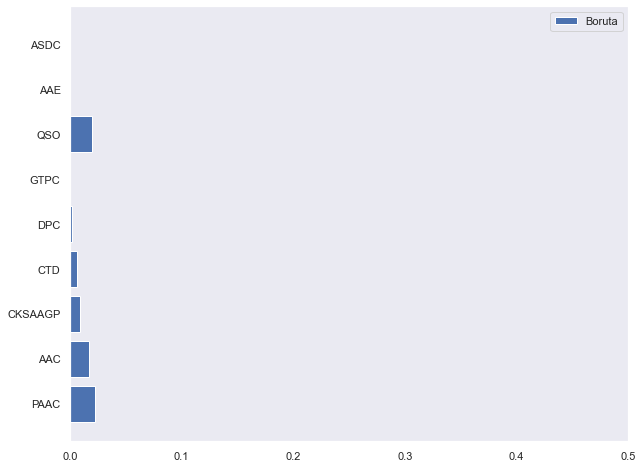

In [18]:
sns.set()
plt.figure(figsize=(10,8))
plt.grid(False)
plt.barh(names,NUm,label='Boruta')
plt.legend(loc='upper right')
plt.xlim(0.0,0.5)

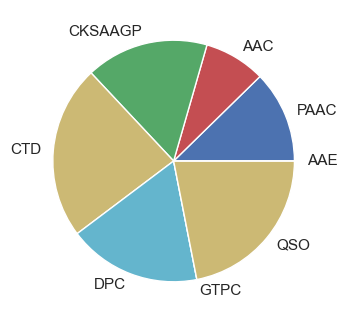

In [38]:
plt.figure(figsize=(10, 4), dpi=100)

# 3）绘制饼图
plt.pie(NUm, labels=names, colors=['b','r','g','y','c','m','y','k'])

# # 显示图例
# plt.legend(loc='best')

# # 添加标题
# plt.title("o1PO )oineH. 93viuo.uod")

# 4）显示图像
plt.show()

In [5]:
X_A = pd.read_csv('data/train/X_train_resampled_all.csv').to_numpy()

In [6]:
X_norm_filtered_train = feat_selector.transform(X_A)
X_train_boruta = pd.DataFrame(X_norm_filtered_train)
X_train_boruta.to_csv('Feature_different/X_train_Boruta_A.csv',index = False)

In [20]:
X_norm_filtered_train = feat_selector.transform(X_train_resampled)
X_train_boruta = pd.DataFrame(X_norm_filtered_train)
X_train_boruta.to_csv('Feature_different/X_train_Boruta.csv',index = False)
X_norm_filtered_test = feat_selector.transform(X_test_norm)
X_test_boruta = pd.DataFrame(X_norm_filtered_test)
X_test_boruta.to_csv('Feature_different/X_test_Boruta.csv',index = False)

In [20]:
feat_selector.support_

array([False, False, False, ..., False, False, False])

In [21]:
num_d = np.zeros([1296,1])
for i in index_[:73]:
    num_d[int(i)]=1

In [22]:
num_D = pd.DataFrame(num_d)
num_D.to_csv('Boruta.csv',index=False)

In [23]:
MI = pd.DataFrame(index_)
MI.to_csv('data/Boruta.csv',index=False)